# Random Forest
<h3>Data - Penguins Size</h3>

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing the data and removing the null data and filling some of it**

In [2]:
data = pd.read_csv("penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
data = data.dropna()

In [4]:
data.at[336, "sex"] = "FEMALE"

**Splitting the data into the Independent and Dependent Features**

In [5]:
x = data.drop(columns="species")
y = data["species"]

**Converting the Dependent Features into the dummies**

In [6]:
x = pd.get_dummies(x, drop_first=True)

**Splitting the Data into the Training and Testing Data**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

**Implementing the Model with default parameters** 

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=16)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

**Evaluating the Performance Matrix**

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix -\n", confusion_matrix(y_test, y_pred))
print("Classification Report -\n", classification_report(y_test, y_pred))

Confusion Matrix -
 [[43  2  0]
 [ 1 18  0]
 [ 0  0 37]]
Classification Report -
               precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        45
   Chinstrap       0.90      0.95      0.92        19
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.96       101
weighted avg       0.97      0.97      0.97       101


**Checking the Important Features**

In [10]:
classifier.feature_importances_

array([0.33418614, 0.34713527, 0.08428495, 0.14331954, 0.05301381,
       0.03277413, 0.00528616])

<h3>Data - Bank Note Authentication</h3>

**Importing the Data and Analysis it**

In [11]:
data = pd.read_csv("data_banknote_authentication.csv")
data

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<Figure size 640x480 with 0 Axes>

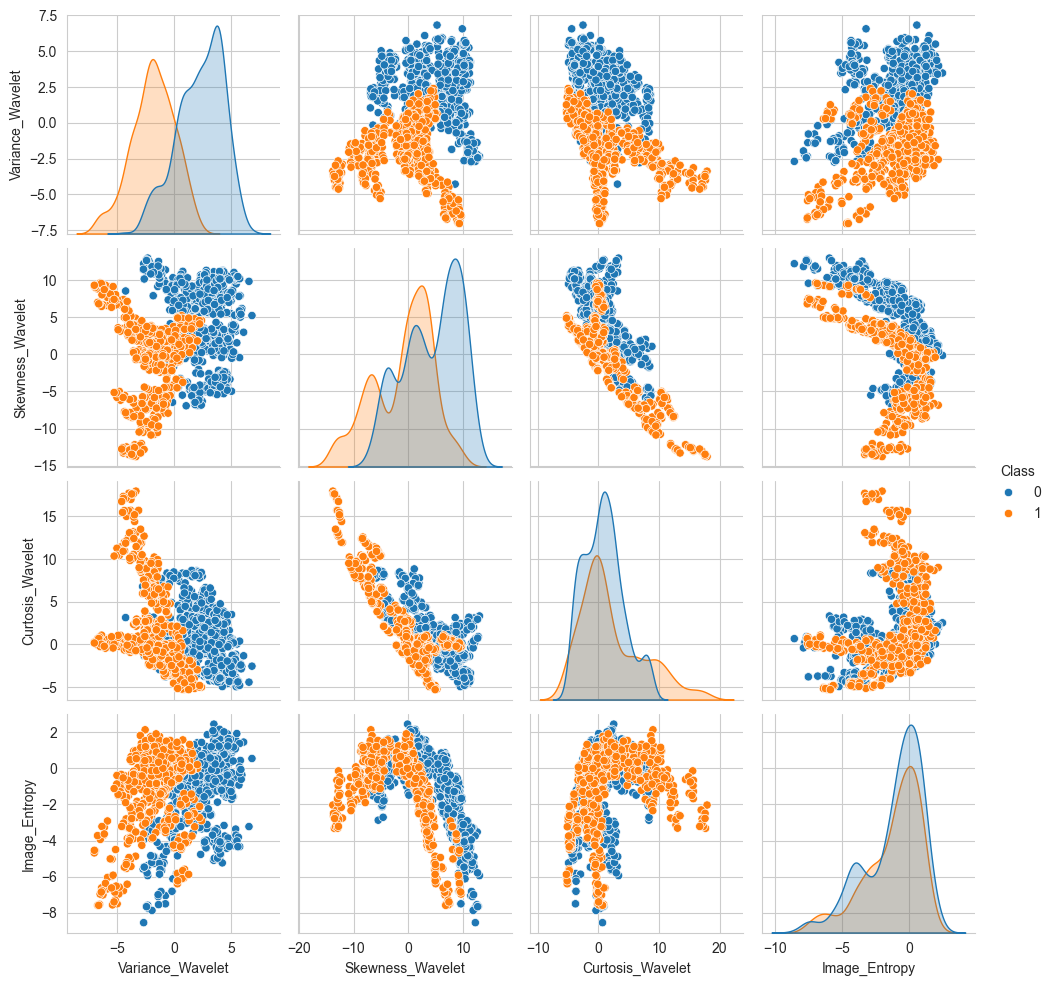

In [12]:
plt.figure(dpi=100)
sns.pairplot(data, hue="Class");

**Splitting the data into the Independent and Dependent Features**

In [13]:
x = data.drop(columns="Class")
y = data["Class"]

**Splitting the Data into the Training and Testing Data**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Implementing the Grid Search CV with base model of Random Forest to find the parameter**

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

param_grid = dict(n_estimators=n_estimators, max_features=max_features, bootstrap=bootstrap, oob_score=oob_score)

model_classifier = RandomForestClassifier()

grid_search = GridSearchCV(model_classifier, param_grid)

In [16]:
grid_search.fit(x_train, y_train)

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packag

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [17]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 128, 'oob_score': False}

In [18]:
prediction = grid_search.predict(x_test)

**Evaluating the Performance Matrix**

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix -\n", confusion_matrix(y_test, prediction))
print("Classification Report -\n", classification_report(y_test, prediction))

Confusion Matrix -
 [[153   1]
 [  0 121]]
Classification Report -
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       121

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


**Checking the best estimators under which grid search found**

In [20]:
errors = []
miss_classification = []

for n in range(1, grid_search.best_params_["n_estimators"]):
    model = RandomForestClassifier(n_estimators=n, max_features=2)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    err = 1 - accuracy_score(y_test, pred)
    n_missed = np.sum(pred != y_test)
    errors.append(err)
    miss_classification.append(n_missed)

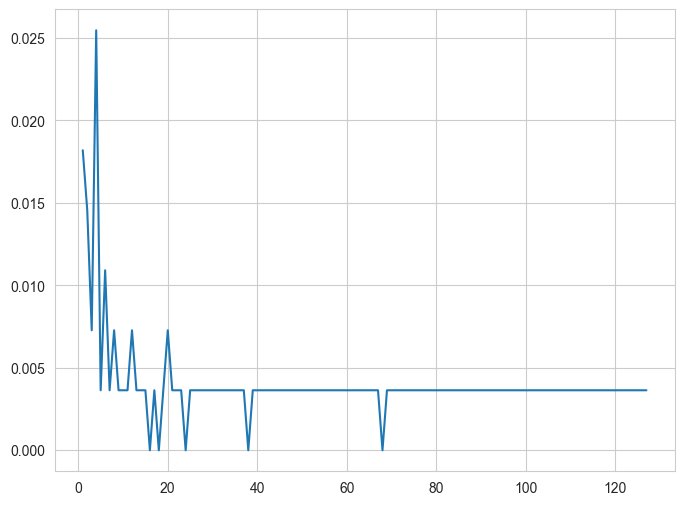

In [21]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(range(1, grid_search.best_params_["n_estimators"]), errors);

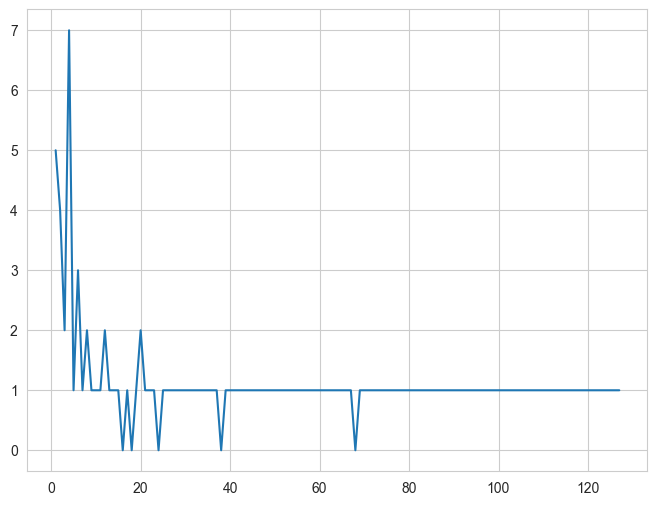

In [22]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(range(1, grid_search.best_params_["n_estimators"]), miss_classification);